In [133]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [134]:
# train dataset

train_df=pd.read_csv('Train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [135]:
print('train dataset (raw,column):',train_df.shape)

train dataset (raw,column): (8523, 12)


In [136]:
# test dataset

test_df=pd.read_csv('Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [137]:
print('test dataset (raw,column):',test_df.shape)

test dataset (raw,column): (5681, 11)


In [138]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


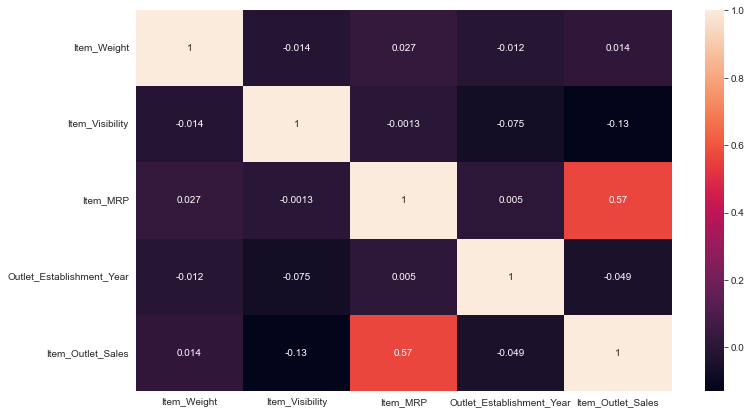

In [139]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=train_df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

In [140]:
#copying test datset

test=test_df.copy()

In [141]:
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [142]:
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [144]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


# Handling missing value

In [145]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [146]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Item_Weight

In [147]:
train_df['Item_Weight'].median()

12.6

In [148]:
test_df['Item_Weight'].median()

12.5

In [149]:
#train_df['Item_Weight']=train_df['Item_Weight'].median()

train_median=train_df['Item_Weight'].median()
test_median=test_df['Item_Weight'].median()

train_df['Item_Weight'].fillna(value=train_median,inplace=True)
test_df['Item_Weight'].fillna(value=test_median,inplace=True) #test data

## Outlet_Size 

In [150]:
train_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [151]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [152]:
train_df['Outlet_Size'].fillna(value=train_df['Outlet_Size'].mode()[0],inplace=True)

In [153]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [154]:
test_df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [155]:
test_df['Outlet_Size'].fillna(value=test_df['Outlet_Size'].mode()[0],inplace=True) #test data

In [156]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Feature engineering Part-1

In [157]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [158]:
train_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [159]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [160]:
test_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

# Data Visualization

## Item_Weight 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

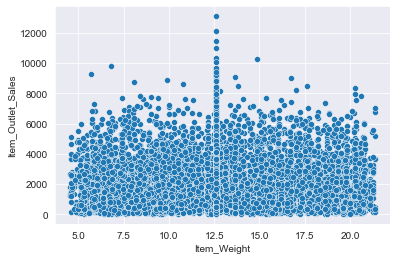

In [161]:
sns.scatterplot(x="Item_Weight", y='Item_Outlet_Sales',data=train_df)

## Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

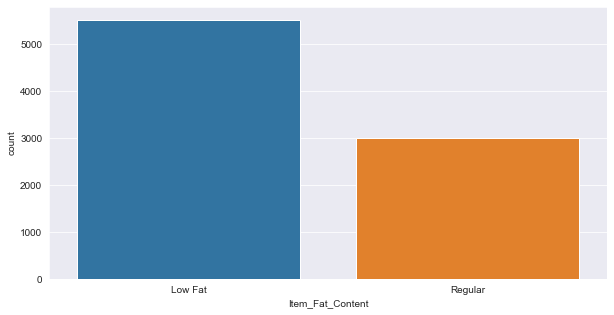

In [162]:
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content',data=train_df)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

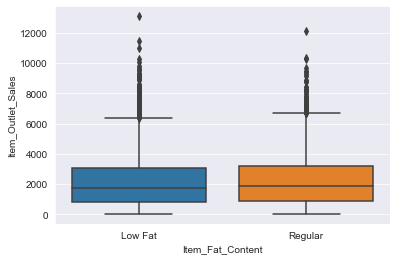

In [163]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train_df)

## Item_Visibility 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

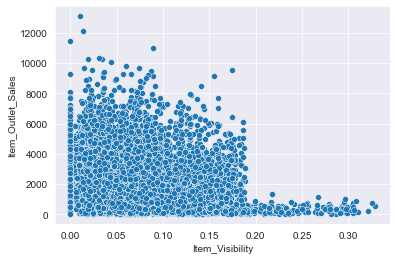

In [164]:
sns.scatterplot(x="Item_Visibility", y='Item_Outlet_Sales',data=train_df)

## Item Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

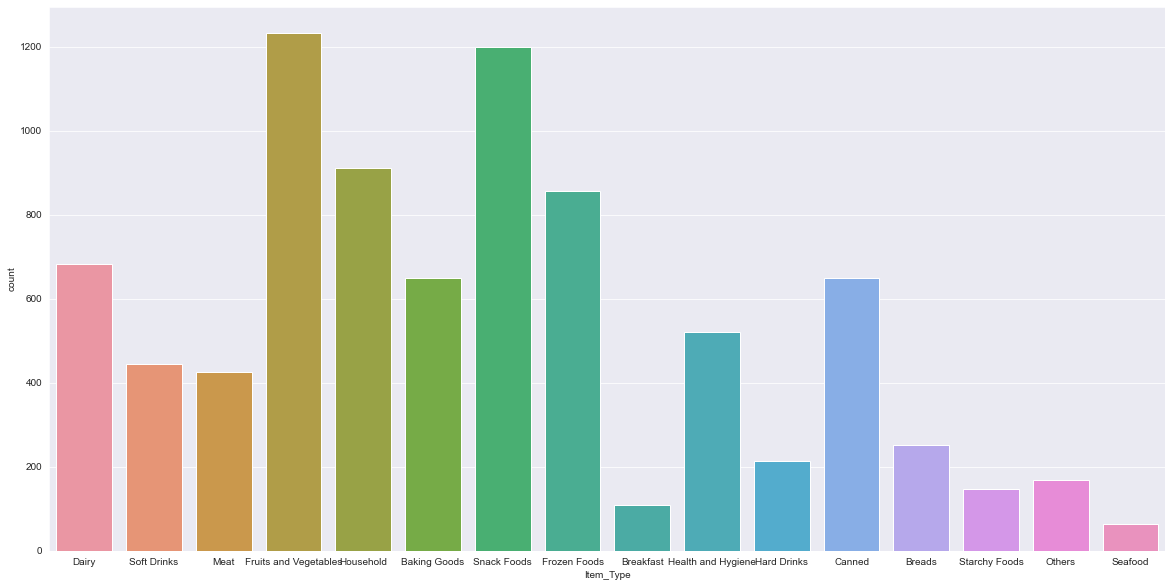

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(x='Item_Type',data=train_df)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

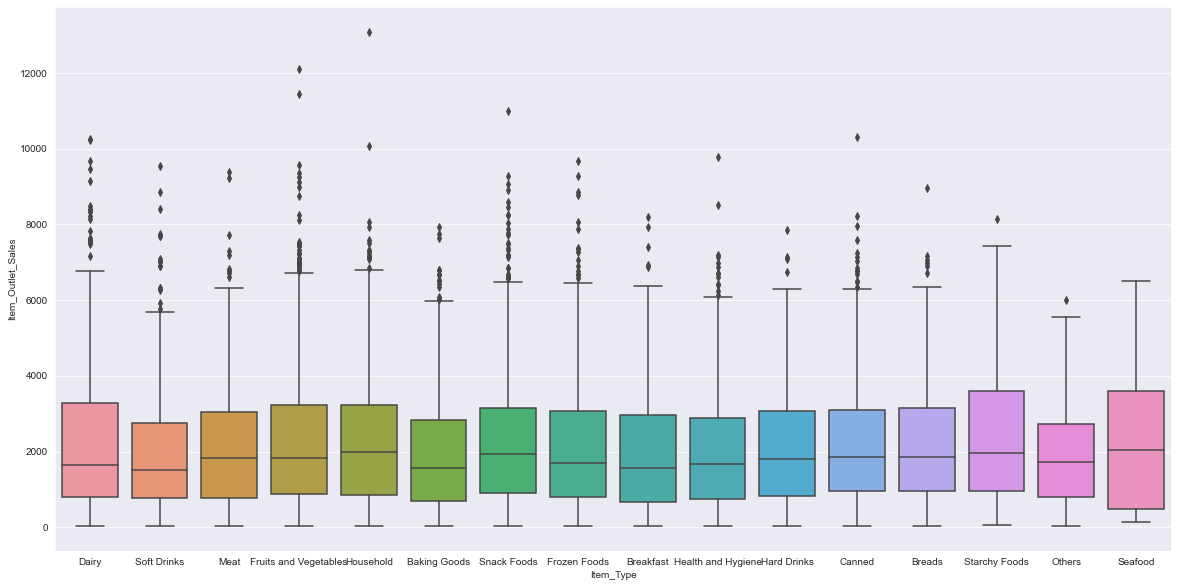

In [166]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train_df)

## Item_MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

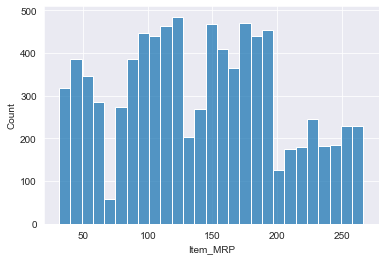

In [167]:
sns.histplot(x='Item_MRP',data=train_df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

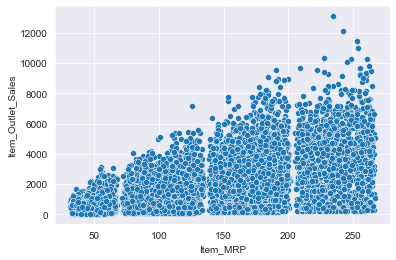

In [168]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales', data=train_df)

## Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

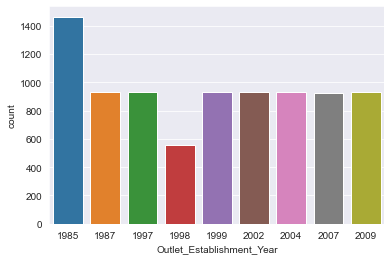

In [169]:
sns.countplot(x='Outlet_Establishment_Year',data=train_df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

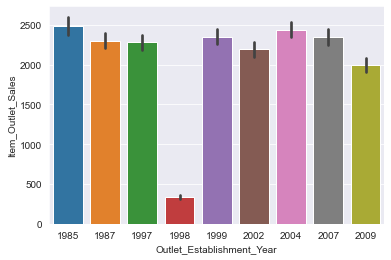

In [170]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data=train_df)

## Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

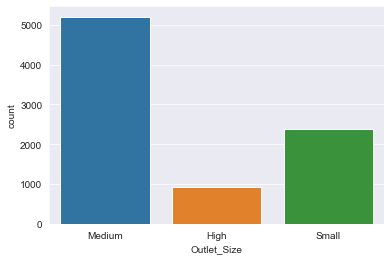

In [171]:
sns.countplot(x='Outlet_Size',data=train_df)

## Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

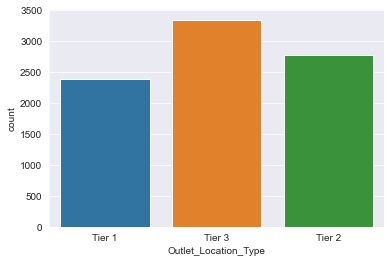

In [172]:
sns.countplot(x='Outlet_Location_Type',data=train_df)

## Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

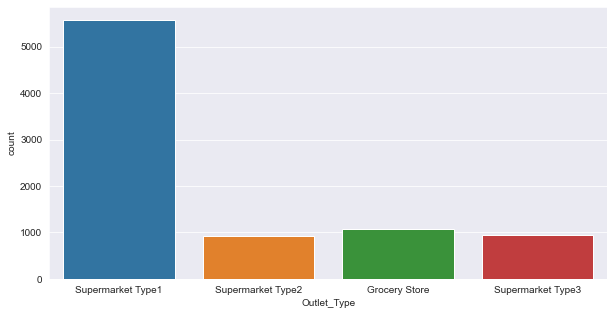

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type',data=train_df)

## Item_Outlet_Sales

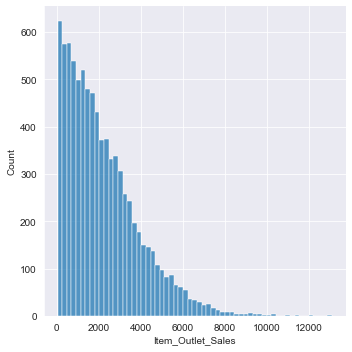

In [174]:
sns.displot(x='Item_Outlet_Sales', data=train_df)

##  Feature engineering Part-2

In [175]:
train_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [176]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [177]:
train_df['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [178]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [179]:
test_df['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [180]:
train_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [181]:
train_df['Item_Type'].replace({'Dairy':0,'Soft Drinks':1 ,'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood' :15 },inplace=True)

In [182]:
test_df['Item_Type'].replace({'Dairy':0,'Soft Drinks':1 ,'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood' :15 },inplace=True)

In [183]:
train_df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [184]:
train_df['Outlet_Size'].replace({'Medium':0, 'High':1, 'Small':2},inplace=True)

In [185]:
test_df['Outlet_Size'].replace({'Medium':0, 'High':1, 'Small':2},inplace=True)

In [186]:
train_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [187]:
train_df['Outlet_Location_Type'].replace({'Tier 1':1, 'Tier 3':3, 'Tier 2':2},inplace=True)

In [188]:
test_df['Outlet_Location_Type'].replace({'Tier 1':1, 'Tier 3':3, 'Tier 2':2},inplace=True)

In [189]:
train_df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [190]:
train_df['Outlet_Type'].replace({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':0,
       'Supermarket Type3':3},inplace=True)

In [191]:
test_df['Outlet_Type'].replace({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':0,
       'Supermarket Type3':3},inplace=True)

In [192]:
#sns.pairplot(train_df,hue='Item_Outlet_Sales')

In [211]:
train_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,0,249.8092,1999,0,1,1,3735.1380
1,5.92,1,0.019278,1,48.2692,2009,0,3,2,443.4228


# Model Building

## Spliting dataset

In [193]:
X=train_df.drop('Item_Outlet_Sales',axis=1)
y=train_df['Item_Outlet_Sales']

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [195]:
#import modules

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear  Regression

In [196]:

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [197]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 854.8352402780295
Mean Squared Error: 1305420.295243035
Root Mean Squared Error: 1142.5499093006988
r2_score: 0.5197076261888354


# KNN

In [198]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [199]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 957.504568053959
Mean Squared Error: 1661993.7301425922
Root Mean Squared Error: 1289.1833578442565
r2 score: 0.3885165438148439


In [200]:
knn_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
knn_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,1397.847100
2957,356.8688,691.779516
7031,377.5086,609.353476
1084,5778.4782,3690.036708
856,2356.9320,3073.066480
4304,865.5400,555.689996
2132,4613.9940,3605.626584
1385,2410.8618,2241.828496
5239,1948.1308,1458.954224
6516,1937.4780,2928.587880


<AxesSubplot:>

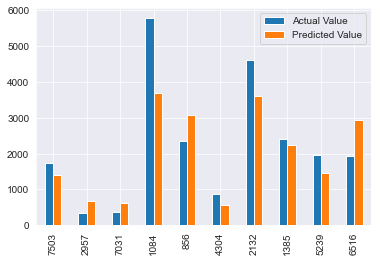

In [201]:
knn_graph = knn_result.head(10)
knn_graph.plot(kind='bar')

# Random Forest

In [202]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 756.5183271284457
Mean Squared Error: 1180563.1505619127
Root Mean Squared Error: 1086.5372292571997
r2_score: 0.5656452714243997


In [204]:
rf_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
rf_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,768.672758
2957,356.8688,912.445610
7031,377.5086,801.217062
1084,5778.4782,4831.923656
856,2356.9320,2413.811294
4304,865.5400,455.793364
2132,4613.9940,5301.099600
1385,2410.8618,1875.711734
5239,1948.1308,1188.559528
6516,1937.4780,2992.864212


<AxesSubplot:>

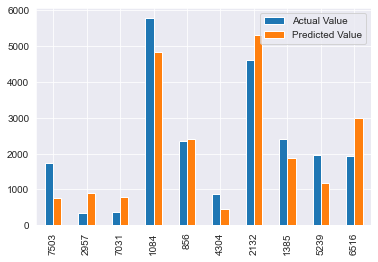

In [205]:
rf_graph = rf_result.head(10)
rf_graph.plot(kind='bar')

# Decision Tree

In [206]:
dt_model=DecisionTreeRegressor()  # We normalize our data for better results
dt_model.fit(X_train,y_train)

y_pred=dt_model.predict(X_test)

In [207]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 1005.2139060410558
Mean Squared Error: 2145171.5956058763
Root Mean Squared Error: 1464.6404321900568
r2_score: 0.21074495192062748


# Applying model in  test dataset

In [208]:
predictions = rf_model.predict(test_df)

In [209]:
# creating csv

output = pd.DataFrame({'Item_Identifier': test['Item_Identifier'], 'Outlet_Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales':predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Pickle File

In [210]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))
model = pickle.load(open('pickle.pkl','rb'))